In [5]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("./image/dog.png")
image.shape

b, g, r = cv2.split(image)
k = 50

libpng warning: iCCP: known incorrect sRGB profile


### Write `compress_image()` using svd

In [6]:
U, S, vt = np.linalg.svd(np.array([[1, 0, 1], [-2, 1, 0]]))
S

array([2.44948974, 1.        ])

In [7]:
def compress_svd(channel: np.ndarray, k: int):
  U, S, Vt = np.linalg.svd(channel)
  channel_compress = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))

  return channel_compress

### Plot K values

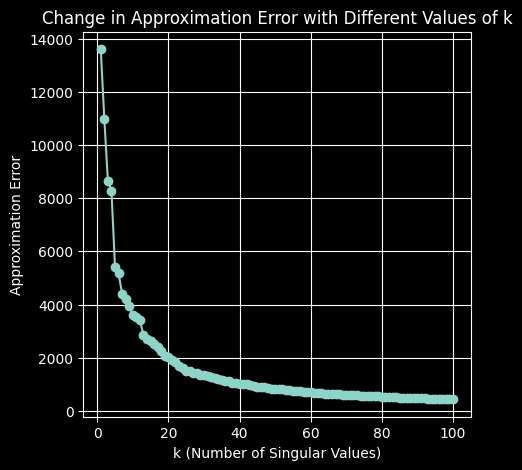

In [8]:
U_b, S_b, Vt_b = np.linalg.svd(b)
U_g, S_g, Vt_g = np.linalg.svd(g)
U_r, S_r, Vt_r = np.linalg.svd(r)
k_values = range(1, 101)


plt.figure(figsize=(5, 5))
plt.plot(k_values, S_b[k_values], marker='o')
plt.title('Change in Approximation Error with Different Values of k')
plt.xlabel('k (Number of Singular Values)')
plt.ylabel('Approximation Error')
plt.grid(True)
plt.show()

### Compare Original Image and Compressed Image

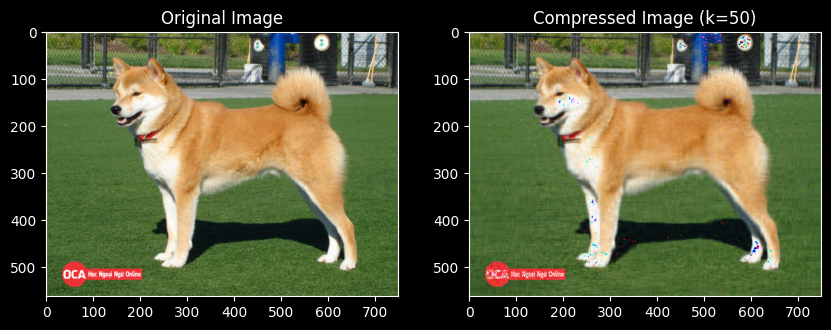

In [9]:
compressed_b = compress_svd(b, k)
compressed_g = compress_svd(g, k)
compressed_r = compress_svd(r, k)

compressed_image = cv2.merge((compressed_b, compressed_g, compressed_r))

# Original Image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Compressed Image
plt.subplot(1, 2, 2)
plt.title(f'Compressed Image (k={k})')
plt.imshow(cv2.cvtColor(compressed_image.astype(np.uint8), cv2.COLOR_BGR2RGB))

plt.show()

### Show chart about **Error** through `k` iteration 

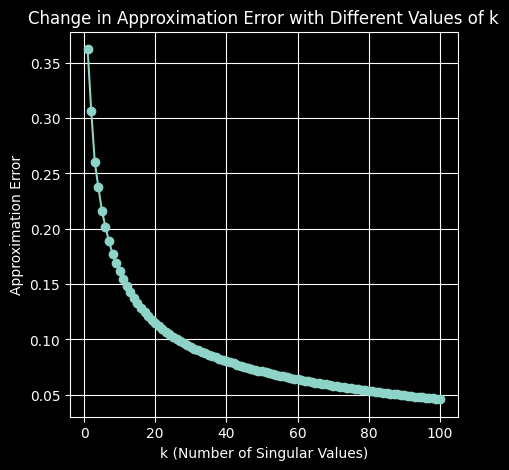

In [10]:
# Create a range of k values to test
k_values = range(1, 101)

# Calculate the best rank-k approximation and store the results
approximation_errors = []
image_norm = np.linalg.norm(image)

for k in k_values:
    compressed_r = compress_svd(r, k)
    compressed_g = compress_svd(g, k)
    compressed_b = compress_svd(b, k)
    compressed_image = cv2.merge((compressed_b, compressed_g, compressed_r))
    approximation_error = np.linalg.norm(image - compressed_image) / image_norm
    approximation_errors.append(approximation_error)

# Plot the change in approximation error with respect to k
plt.figure(figsize=(5, 5))
plt.plot(k_values, approximation_errors, marker='o')
plt.title('Change in Approximation Error with Different Values of k')
plt.xlabel('k (Number of Singular Values)')
plt.ylabel('Approximation Error')
plt.grid(True)
plt.show()

### Find the best rank-k Approximation